In [ ]:
from experiment_utils import *
from model import ViT
from configs import b16_config
from torchvision.datasets import CIFAR10
from torchvision import transforms

In [ ]:
config = b16_config()
config.update({'num_classes':10})
model = load_model(ViT, 'pretrained/cifar10_224.pth', config)

In [ ]:
dataset = CIFAR10(root='../datasets', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

data = dataset.data
label = dataset.targets

In [ ]:
model_summary(model, 3, 224, 'cpu')

                                                   Kernel Shape  \
Layer                                                             
0_to_patch                                                    -   
1_linear_projection                                  [256, 768]   
2_transformer_encoder.blocks.0.LayerNorm_layer_...        [768]   
3_transformer_encoder.blocks.0.msa.Linear_fc_q       [768, 768]   
4_transformer_encoder.blocks.0.msa.Linear_fc_k       [768, 768]   
5_transformer_encoder.blocks.0.msa.Linear_fc_v       [768, 768]   
6_transformer_encoder.blocks.0.msa.Dropout_dropout            -   
7_transformer_encoder.blocks.0.msa.Linear_fc_o       [768, 768]   
8_transformer_encoder.blocks.0.Dropout_dropout                -   
9_transformer_encoder.blocks.0.LayerNorm_layer_...        [768]   
10_transformer_encoder.blocks.0.mlp.Linear_fc1      [768, 3072]   
11_transformer_encoder.blocks.0.mlp.GELU_activa...            -   
12_transformer_encoder.blocks.0.mlp.Dropout_dro...            

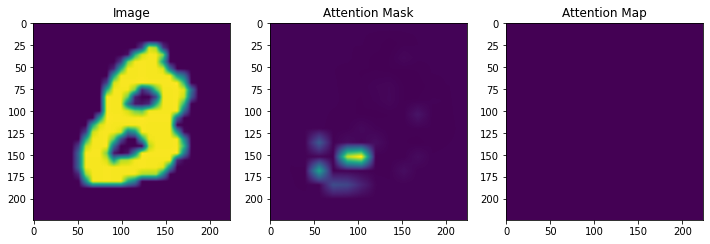

In [ ]:
import random
from torchvision import transforms
transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
x = transform(data[random.randint(0, 10000)].unsqueeze(0)).squeeze()

plot_attention_map(x, model, 224, 'cpu')

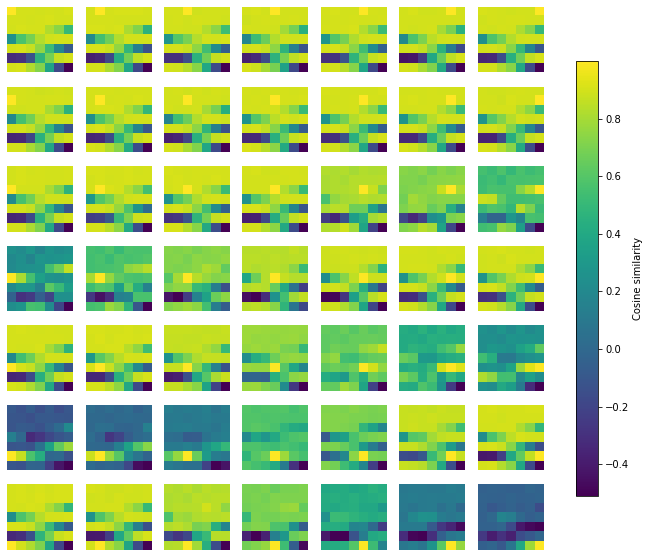

In [ ]:
pos_embeddings = model.pos_embedding.squeeze()[1:, :]
plot_pos_emb_similarity(pos_embeddings, 7, 7)

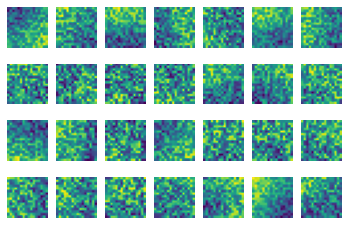

In [ ]:
embed_filters = model.linear_projection.weight
plot_rgb_filters(embed_filters, 16)